In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('height-weight.csv')

In [3]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
data.shape

(23, 2)

Text(0, 0.5, 'Height')

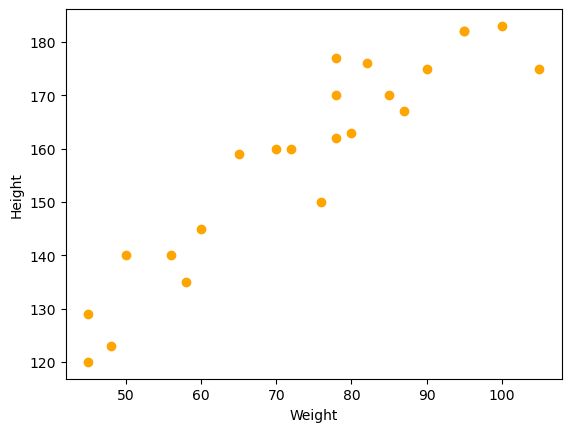

In [5]:
plt.scatter(data['Weight'],data['Height'], color='orange')
plt.xlabel("Weight")
plt.ylabel('Height')

(array([3., 4., 1., 8., 7.]),
 array([120. , 132.6, 145.2, 157.8, 170.4, 183. ]),
 <BarContainer object of 5 artists>)

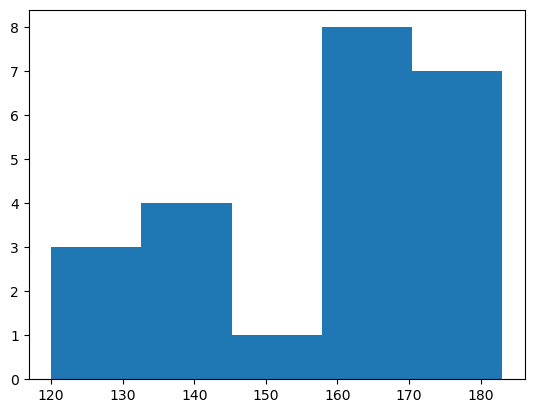

In [6]:
plt.hist(data['Height'], bins=5)

(array([5., 3., 7., 4., 4.]),
 array([ 45.,  57.,  69.,  81.,  93., 105.]),
 <BarContainer object of 5 artists>)

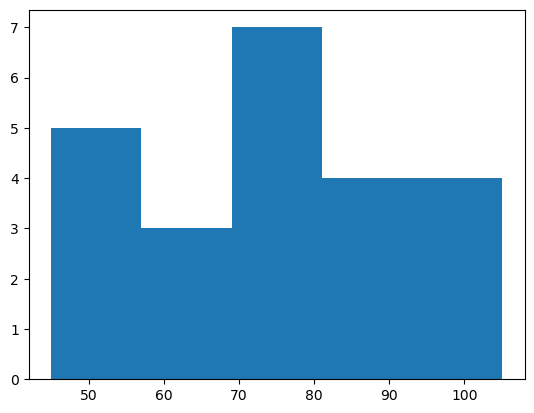

In [7]:
plt.hist(data['Weight'], bins=5)

/var/folders/rc/76flhrzn4pgf33r81dt4lky00000gn/T/ipykernel_2508/2799343561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

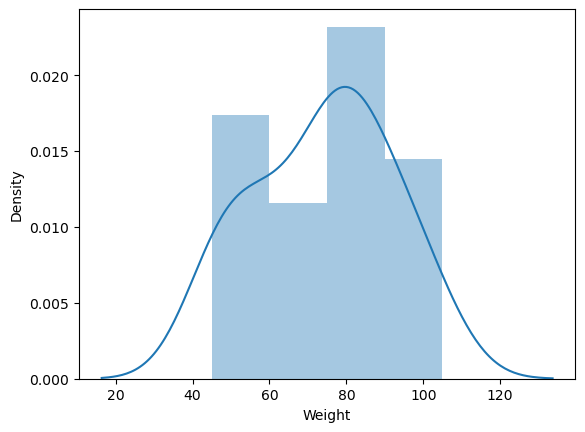

In [8]:
sns.distplot(data['Weight'])

/var/folders/rc/76flhrzn4pgf33r81dt4lky00000gn/T/ipykernel_2508/4069851554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

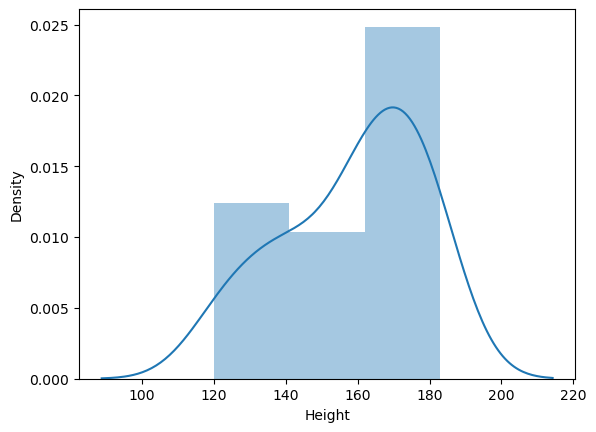

In [9]:
sns.distplot(data['Height'])

In [10]:
X=data[['Weight']]
y=data['Height']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=23)

In [13]:
X_train.shape

(17, 1)

In [14]:
X_test.shape

(6, 1)

### Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
Scaler=StandardScaler()

In [17]:
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [18]:
X_train

array([[ 0.06361243],
       [ 0.06361243],
       [-1.64387903],
       [-1.07471521],
       [-1.18854797],
       [-0.96088244],
       [-0.27788586],
       [ 0.29127795],
       [ 0.74660901],
       [ 1.03119092],
       [ 1.60035473],
       [ 1.31577282],
       [-1.81462817],
       [ 0.06361243],
       [ 1.03119092],
       [ 0.17744519],
       [ 0.57585986]])

In [19]:
X_test

array([[-0.05022034],
       [ 0.4620271 ],
       [-1.53004626],
       [-0.39171863],
       [-1.81462817],
       [-0.67630054]])

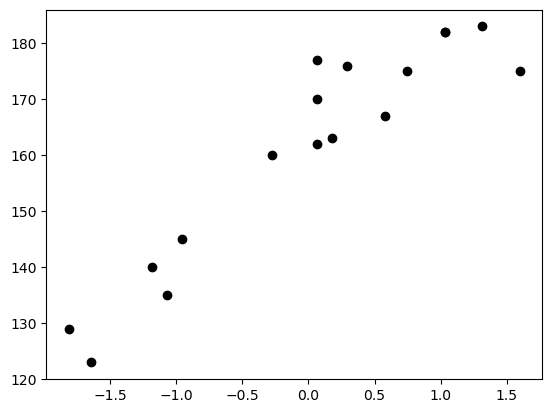

In [20]:
plt.scatter(X_train, y_train, color='black')

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
LR=LinearRegression()

In [23]:
LR.fit(X_train, y_train)

LinearRegression()

In [24]:
# Coefficent or Slope of Weight

LR.coef_

array([17.88454513])

In [25]:
# Intercept

LR.intercept_

161.41176470588235

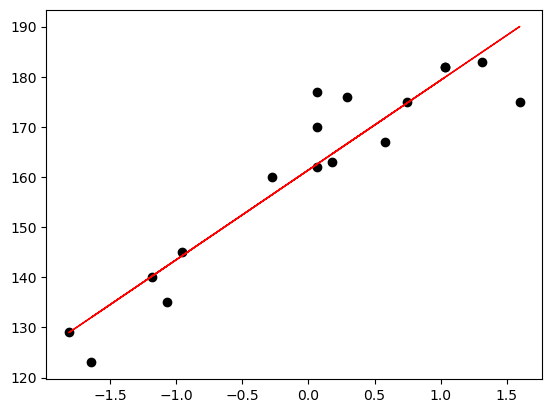

In [26]:
plt.scatter(X_train, y_train, color='Black')
plt.plot(X_train, LR.predict(X_train), color='red', linewidth=1)

In [27]:
y_pred_test=LR.predict(X_test)

In [28]:
y_pred_test, X_test

(array([160.51359683, 169.67490921, 134.04758328, 154.40605524,
        128.9579653 , 149.31643725]),
 array([[-0.05022034],
        [ 0.4620271 ],
        [-1.53004626],
        [-0.39171863],
        [-1.81462817],
        [-0.67630054]]))

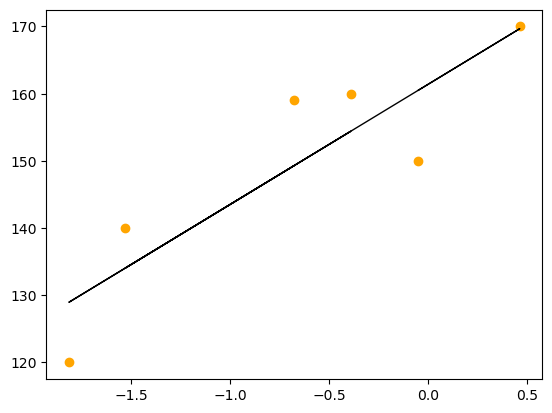

In [29]:
plt.scatter(X_test, y_test, color='Orange')
plt.plot(X_test, y_pred_test, color='Black', linewidth=1)

### Performance Metrics

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)

In [32]:
mse

58.563569123721344

In [33]:
mae

6.837762857014752

In [34]:
rmse

7.6526837856873025

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2=r2_score(y_test, y_pred_test)*100

In [37]:
r2

77.77239337423335

In [38]:
# New Data Point 

scaled_weight=Scaler.transform([[80]])
scaled_weight

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.17744519]])

In [39]:
LR.predict(scaled_weight)

array([164.58529122])